In [8]:
pip install textblob

     ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
     - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
     ------- ------------------------------ 122.9/626.3 kB 2.4 MB/s eta 0:00:01
     ----------- -------------------------- 184.3/626.3 kB 1.4 MB/s eta 0:00:01
     --------------- ---------------------- 256.0/626.3 kB 1.4 MB/s eta 0:00:01
     ------------------- ------------------ 317.4/626.3 kB 1.4 MB/s eta 0:00:01
     ---------------------- --------------- 368.6/626.3 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 419.8/626.3 kB 1.3 MB/s eta 0:00:01
     ---------------------------- --------- 471.0/626.3 kB 1.2 MB/s eta 0:00:01
     ------------------------------- ------ 512.0/626.3 kB 1.2 MB/s eta 0:00:01
     --------------------------------- ---- 553.0/626.3 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  624.6/626.3 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 626.3/626


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Importing libraries
import re
import csv
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from textblob import TextBlob

In [11]:
def extract_dialogues(script_path):
    with open(script_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    dialogues = []
    current_character = None
    current_dialogue = []

    # Iterate through the lines in the script
    for i in range(len(lines) - 1):
        line = lines[i].strip()
        next_line = lines[i + 1].strip()

        # Regular expression to match character lines (uppercase, may contain numbers or certain symbols)
        is_character_line = re.match(r"^[A-Z0-9# ]+(?<!:)$", line)

        # Check if the line matches the character line pattern and is followed by a non-empty line
        if is_character_line and line and next_line:
            if current_character:
                # Save the previous dialogue before starting a new one
                dialogues.append((current_character, " ".join(current_dialogue).strip()))
            current_character = line
            current_dialogue = [next_line]
        elif current_character and line:
            # Continue capturing dialogue if the line is not empty
            current_dialogue.append(line)
        elif current_character and not line:
            # Stop capturing dialogue on empty line
            dialogues.append((current_character, " ".join(current_dialogue).strip()))
            current_character = None
            current_dialogue = []

    # Append the last captured dialogue if not ended by an empty line
    if current_character and current_dialogue:
        dialogues.append((current_character, " ".join(current_dialogue).strip()))

    return dialogues

def save_to_csv(dialogues, output_csv_path):
    with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Character', 'Dialogue'])
        for name, dialogue in dialogues:
            writer.writerow([name, dialogue])

script_path = 'Avengers_Script.txt'
output_csv_path = 'Avengers_Dialogues.csv'

# Extract and save dialogues
dialogues = extract_dialogues(script_path)
save_to_csv(dialogues, output_csv_path)

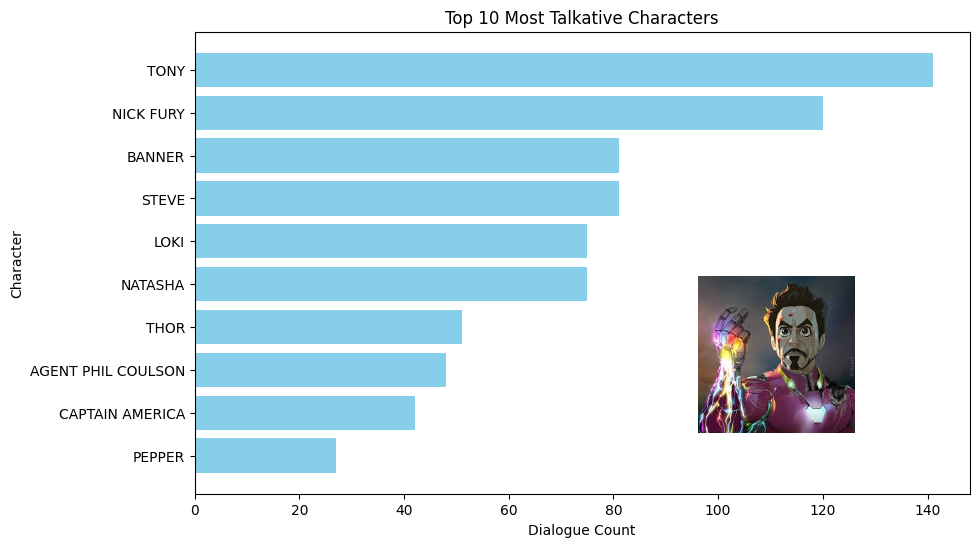

In [14]:
def character_dialogue_count(csv_file):
    character_count = {}
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            character = row[0]
            if character in character_count:
                character_count[character] += 1
            else:
                character_count[character] = 1
    sorted_count = sorted(character_count.items(), key=lambda x: x[1], reverse=True)
    return sorted_count[:10]

def most_talkative(characters):
    characters, counts = zip(*characters)
    plt.figure(figsize=(10, 6))
    plt.barh(characters, counts, color='skyblue')
    plt.xlabel('Dialogue Count')
    plt.ylabel('Character')
    plt.title('Top 10 Most Talkative Characters')
    plt.gca().invert_yaxis()
    img = plt.imread("download.jpeg")
    imagebox = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(imagebox, (0.75, 0.3), xycoords='axes fraction', frameon=False)
    plt.gca().add_artist(ab) 
    plt.show()

def main():
    csv_file = 'Avengers_Dialogues.csv'
    talkativecharacters_inscript = character_dialogue_count(csv_file)
    most_talkative(talkativecharacters_inscript)

if __name__ == "__main__":
    main()

In [16]:
def analyze_emotions_in_script(dialogues):
    emotion_values = {'positive': 0, 'negative': 0, 'neutral': 0}    
    for dialogue in dialogues:
        blob = TextBlob(dialogue)
        sentiment = blob.sentiment.polarity 
        if sentiment > 0:
            emotion_values['positive'] += 1
        elif sentiment < 0:
            emotion_values['negative'] += 1
        else:
            emotion_values['neutral'] += 1
    return emotion_values

def main():
    csv_file = 'Avengers_Dialogues.csv'
    characters_dialogues = {}
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            character = row[0]
            dialogue = row[1]
            if character in characters_dialogues:
                characters_dialogues[character].append(dialogue)
            else:
                characters_dialogues[character] = [dialogue]
    for character, dialogues in characters_dialogues.items():
        if len(dialogues) > 20:  # Character has more than 20 dialogues
            print(f"Emotional Analysis for {character}:")
            emotion_values = analyze_emotions_in_script(dialogues)
            for emotion, count in emotion_values.items():
                print(f"{emotion.capitalize()}: {count}")
            print()

if __name__ == "__main__":
    main()

Emotional Analysis for NICK FURY:
Positive: 28
Negative: 21
Neutral: 71

Emotional Analysis for AGENT PHIL COULSON:
Positive: 12
Negative: 10
Neutral: 26

Emotional Analysis for AGENT MARIA HILL:
Positive: 7
Negative: 2
Neutral: 16

Emotional Analysis for CLINT BARTON:
Positive: 5
Negative: 0
Neutral: 18

Emotional Analysis for LOKI:
Positive: 14
Negative: 7
Neutral: 54

Emotional Analysis for NATASHA:
Positive: 18
Negative: 9
Neutral: 48

Emotional Analysis for BANNER:
Positive: 16
Negative: 22
Neutral: 43

Emotional Analysis for STEVE:
Positive: 18
Negative: 14
Neutral: 49

Emotional Analysis for TONY:
Positive: 38
Negative: 21
Neutral: 82

Emotional Analysis for PEPPER:
Positive: 5
Negative: 5
Neutral: 17

Emotional Analysis for CAPTAIN AMERICA:
Positive: 8
Negative: 10
Neutral: 24

Emotional Analysis for IRON MAN:
Positive: 6
Negative: 2
Neutral: 19

Emotional Analysis for THOR:
Positive: 10
Negative: 5
Neutral: 36



In [18]:
def analyze_emotioninscript(dialogues):
    emotional_points = {'happy': 0, 'sad': 0, 'angry': 0, 'fear': 0, 'neutral': 0}   
    for dialogue in dialogues:
        blob = TextBlob(dialogue)
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            emotional_points['happy'] += 1
        elif sentiment < 0:
            emotional_points['sad'] += 1
        elif sentiment == 0:
            emotional_points['neutral'] += 1
    return emotional_points

def emotionaltimeline(csv_file):
    characters_dialogues = {}
    emotional_timeline = {'happy': [], 'sad': [], 'angry': [], 'fear': [], 'neutral': []}
    dialogue_number = 0
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            character = row[0]
            dialogue = row[1]
            if character in characters_dialogues:
                characters_dialogues[character].append((dialogue_number, dialogue))
            else:
                characters_dialogues[character] = [(dialogue_number, dialogue)]
            dialogue_number += 1
    for character, dialogues in characters_dialogues.items():
        emotional_points = analyze_emotioninscript([dialogue for _, dialogue in dialogues])
        for emotion, count in emotional_points.items():
            emotional_timeline[emotion].append((character, count, dialogues[0][0]))  # First dialogue number
    return emotional_timeline

def highest_emotionalpoints(emotional_timeline, threshold):
    high_emotion_points = []
    for emotion, points in emotional_timeline.items():
        for point in points:
            character, count, dialogue_number = point
            if count >= threshold:
                high_emotion_points.append((dialogue_number, character, emotion.capitalize(), count))
    return high_emotion_points

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = emotionaltimeline(csv_file)
    high_emotion_points = highest_emotionalpoints(emotional_timeline, threshold=20)   
    print("High Emotion Points:")
    for point in high_emotion_points:
        print(f"Dialogue {point[0]} - {point[1]} feels {point[2]}")

if __name__ == "__main__":
    main()

High Emotion Points:
Dialogue 3 - NICK FURY feels Happy
Dialogue 177 - TONY feels Happy
Dialogue 3 - NICK FURY feels Sad
Dialogue 102 - BANNER feels Sad
Dialogue 177 - TONY feels Sad
Dialogue 3 - NICK FURY feels Neutral
Dialogue 4 - AGENT PHIL COULSON feels Neutral
Dialogue 43 - LOKI feels Neutral
Dialogue 76 - NATASHA feels Neutral
Dialogue 102 - BANNER feels Neutral
Dialogue 156 - STEVE feels Neutral
Dialogue 177 - TONY feels Neutral
Dialogue 326 - CAPTAIN AMERICA feels Neutral
Dialogue 362 - THOR feels Neutral


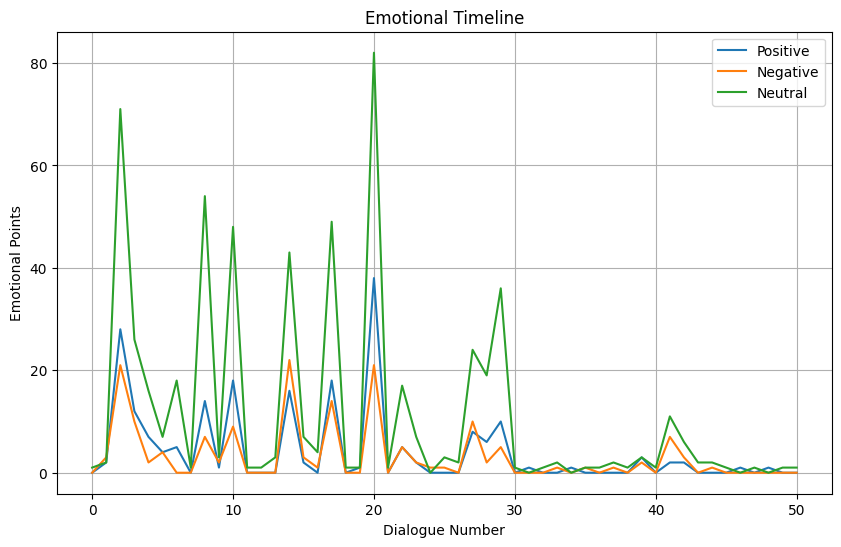

In [19]:
def analyze_script_emotion(dialogues):
    emotional_points = {'positive': 0, 'negative': 0, 'neutral': 0} 
    for dialogue in dialogues:
        blob = TextBlob(dialogue)
        sentiment = blob.sentiment.polarity    
        if sentiment > 0:
            emotional_points['positive'] += 1
        elif sentiment < 0:
            emotional_points['negative'] += 1
        else:
            emotional_points['neutral'] += 1
    return emotional_points

def emotionaltimeline(csv_file):
    characters_dialogues = {}
    timeline = {'positive': [], 'negative': [], 'neutral': []}  
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            character = row[0]
            dialogue = row[1]   
            if character in characters_dialogues:
                characters_dialogues[character].append(dialogue)
            else:
                characters_dialogues[character] = [dialogue]   
    for character, dialogues in characters_dialogues.items():
        emotional_points = analyze_script_emotion(dialogues)
        for emotion, count in emotional_points.items():
            timeline[emotion].append(count)  
    return timeline

def plot_timeline(timeline):
    plt.figure(figsize=(10, 6))   
    for emotion, counts in timeline.items():
        plt.plot(counts, label=emotion.capitalize())   
    plt.title('Emotional Timeline')
    plt.xlabel('Dialogue Number')
    plt.ylabel('Emotional Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = emotionaltimeline(csv_file)
    plot_timeline(emotional_timeline)

if __name__ == "__main__":
    main()


In [20]:
def analyze_emotion(dialogues):
    emotional_points = {'happy': 0, 'sad': 0, 'angry': 0, 'fear': 0}
    for dialogue in dialogues:
        blob = TextBlob(dialogue)
        sentiment = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        if sentiment > 0.1 and subjectivity > 0.5:  # Happy
            emotional_points['happy'] += 1
        elif sentiment < -0.1 and subjectivity > 0.5:  # Sad
            emotional_points['sad'] += 1
        elif sentiment > 0.1 and subjectivity < 0.5:  # Angry
            emotional_points['angry'] += 1
        elif sentiment < -0.1 and subjectivity < 0.5:  # Fearful
            emotional_points['fear'] += 1
    return emotional_points

def generate_timeline(csv_file):
    characters_dialogues = {}
    emotional_timeline = {'happy': [], 'sad': [], 'angry': [], 'fear': [], 'neutral': []}
    dialogue_number = 0   
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            character = row[0]
            dialogue = row[1]
            if character in characters_dialogues:
                characters_dialogues[character].append((dialogue_number, dialogue))
            else:
                characters_dialogues[character] = [(dialogue_number, dialogue)]
            dialogue_number += 1
    for character, dialogues in characters_dialogues.items():
        emotional_points = analyze_emotion([dialogue for _, dialogue in dialogues])
        for emotion, count in emotional_points.items():
            emotional_timeline[emotion].append((character, count, dialogues[0][0]))  # First dialogue number
    return emotional_timeline

def highest_emotionalpoints(emotional_timeline, threshold):
    high_emotion_points = {'happy': [], 'sad': [], 'angry': [], 'fear': []}
    
    for emotion, points in emotional_timeline.items():
        for point in points:
            character, count, dialogue_number = point
            if count >= threshold:
                high_emotion_points[emotion].append((dialogue_number, character, count))
    return high_emotion_points

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_emotional_timeline(csv_file)
    high_emotion_points = get_high_emotion_points(emotional_timeline, threshold=5)
    print("High Emotion Points:")
    for point in high_emotion_points:
        print(f"Dialogue {point[0]} - {point[1]} feels {point[2]}")

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)
    high_emotion_threshold = 5
    high_emotion_points = highest_emotionalpoints(emotional_timeline, high_emotion_threshold)
    for emotion, points in high_emotion_points.items():
        print(f"\nHigh {emotion.capitalize()} Emotion Points:")
        for point in points:
            dialogue_number, character, count = point
            print(f"Dialogue {dialogue_number} - {character} feels {emotion.capitalize()} (Count: {count})")

if __name__ == "__main__":
    main()


High Happy Emotion Points:
Dialogue 3 - NICK FURY feels Happy (Count: 10)
Dialogue 43 - LOKI feels Happy (Count: 12)
Dialogue 76 - NATASHA feels Happy (Count: 9)
Dialogue 102 - BANNER feels Happy (Count: 7)
Dialogue 156 - STEVE feels Happy (Count: 8)
Dialogue 177 - TONY feels Happy (Count: 19)
Dialogue 333 - IRON MAN feels Happy (Count: 5)

High Sad Emotion Points:
Dialogue 3 - NICK FURY feels Sad (Count: 9)
Dialogue 102 - BANNER feels Sad (Count: 13)
Dialogue 156 - STEVE feels Sad (Count: 9)
Dialogue 177 - TONY feels Sad (Count: 11)
Dialogue 326 - CAPTAIN AMERICA feels Sad (Count: 7)
Dialogue 813 - BLACK WIDOW feels Sad (Count: 5)

High Angry Emotion Points:
Dialogue 3 - NICK FURY feels Angry (Count: 6)
Dialogue 102 - BANNER feels Angry (Count: 7)
Dialogue 177 - TONY feels Angry (Count: 7)

High Fear Emotion Points:
Dialogue 3 - NICK FURY feels Fear (Count: 8)
Dialogue 76 - NATASHA feels Fear (Count: 5)
Dialogue 177 - TONY feels Fear (Count: 5)


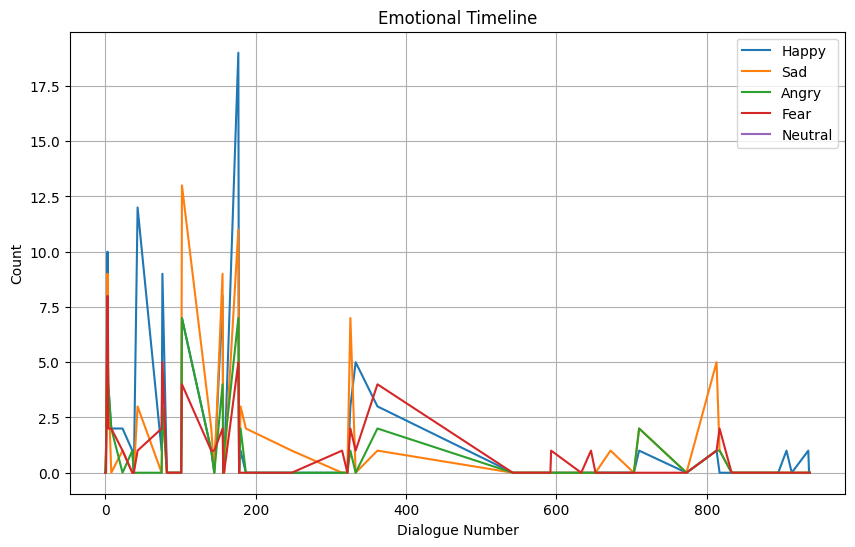

In [22]:
def timeline(emotional_timeline):
    plt.figure(figsize=(10, 6))
    for emotion, points in emotional_timeline.items():
        dialogue_numbers = [point[2] for point in points]
        counts = [point[1] for point in points]
        plt.plot(dialogue_numbers, counts, label=emotion.capitalize())
    plt.title('Emotional Timeline')
    plt.xlabel('Dialogue Number')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)
    timeline(emotional_timeline)
    
if __name__ == "__main__":
    main()

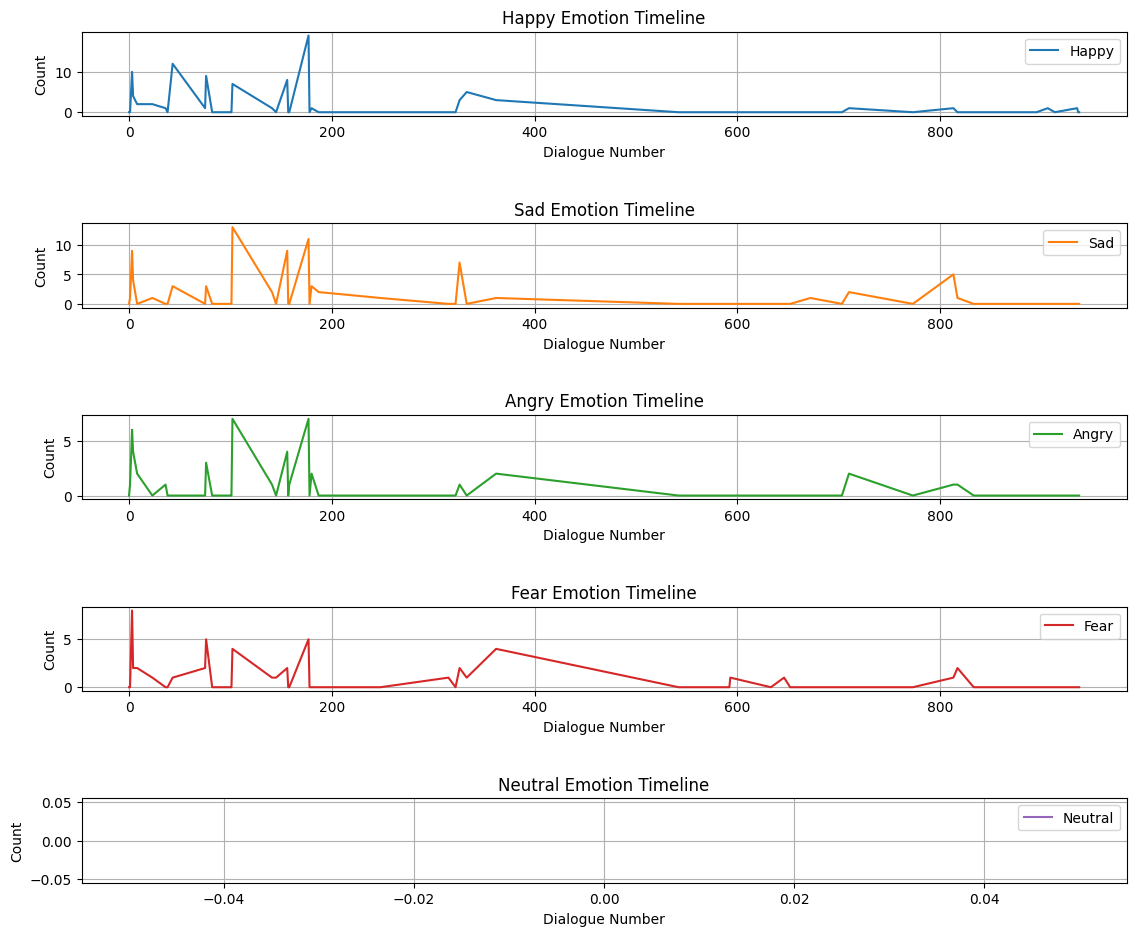

In [23]:
def timeline(emotional_timeline):
    plt.figure(figsize=(12, 10))
    emotions = list(emotional_timeline.keys())
    num_plots = len(emotions)
    for i, emotion in enumerate(emotions, 1):
        plt.subplot(num_plots, 1, i)
        points = emotional_timeline[emotion]
        dialogue_numbers = [point[2] for point in points]
        counts = [point[1] for point in points]
        plt.plot(dialogue_numbers, counts, label=emotion.capitalize(), color='C'+str(i-1))
        plt.title(emotion.capitalize() + ' Emotion Timeline')
        plt.xlabel('Dialogue Number')
        plt.ylabel('Count')
        plt.grid(True)
        plt.legend()
    plt.tight_layout(pad=3.0)
    plt.show()

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)
    timeline(emotional_timeline)
    
if __name__ == "__main__":
    main()


In [24]:
def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)
    total_dialogues = sum(len(points) for points in emotional_timeline.values())
    print("Emotion Percentage:")
    for emotion, points in emotional_timeline.items():
        percentage = (len(points) / total_dialogues) * 100
        print(f"{emotion.capitalize()}: {percentage:.2f}%")

if __name__ == "__main__":
    main()

Emotion Percentage:
Happy: 25.00%
Sad: 25.00%
Angry: 25.00%
Fear: 25.00%
Neutral: 0.00%


In [25]:
def character_emotion(emotional_timeline):
    characters_emotion_counts = {'happy': {}, 'sad': {}, 'angry': {}, 'fear': {}}   
    for emotion, points in emotional_timeline.items():
        for point in points:
            character, count, _ = point
            if character not in characters_emotion_counts[emotion]:
                characters_emotion_counts[emotion][character] = count
            else:
                characters_emotion_counts[emotion][character] += count
    characters_highest_emotion = {}
    for emotion, counts in characters_emotion_counts.items():
        highest_character = max(counts, key=counts.get)
        characters_highest_emotion[emotion] = (highest_character, counts[highest_character])    
    return characters_highest_emotion

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)
    characters_highest_emotion = character_emotion(emotional_timeline)
    print("\nCharacters with Highest Amount of Each Emotion:")
    for emotion, (character, count) in characters_highest_emotion.items():
        print(f"{emotion.capitalize()} character: {character} ({count} times)")

if __name__ == "__main__":
    main()


Characters with Highest Amount of Each Emotion:
Happy character: TONY (19 times)
Sad character: BANNER (13 times)
Angry character: BANNER (7 times)
Fear character: NICK FURY (8 times)


In [31]:
def determine_genres(emotional_timeline, dialogues):
    total_emotional_points = {emotion: sum(count for _, count, _ in points) for emotion, points in emotional_timeline.items()}
    total_points = sum(total_emotional_points.values())
    genres = []
    if total_emotional_points['happy'] > total_points * 0.3:
        genres.append("Comedy")
    if total_emotional_points['sad'] > total_points * 0.3:
        genres.append("Drama")
    if total_emotional_points['angry'] > total_points * 0.2:
        genres.append("Action")
    if total_emotional_points['fear'] > total_points * 0.2:
        genres.append("Horror")
    if total_emotional_points['angry'] > total_points * 0.1 and total_emotional_points['fear'] > total_points * 0.1:
        genres.append("Thriller")
    keywords_sci_fi = ["space", "alien", "robot", "future"]
    keywords_fantasy = ["magic", "wizard", "dragon", "fantasy"]
    for dialogue in dialogues:
        dialogue_lower = dialogue.lower()
        if any(keyword in dialogue_lower for keyword in keywords_sci_fi):
            genres.append("Sci-Fi")
        if any(keyword in dialogue_lower for keyword in keywords_fantasy):
            genres.append("Fantasy")
    if not genres:
        genres.append("Uncertain")   
    return genres

def determine_genre(genres):
    if "Sci-Fi" in genres:
        return "Sci-Fi"
    elif "Fantasy" in genres:
        return "Fantasy"
    elif "Comedy" in genres:
        return "Comedy"
    elif "Drama" in genres:
        return "Drama"
    elif "Action" in genres:
        return "Action"
    elif "Horror" in genres:
        return "Horror"
    elif "Thriller" in genres:
        return "Thriller"
    else:
        return "Uncertain"

def main():
    csv_file = 'Avengers_Dialogues.csv'
    emotional_timeline = generate_timeline(csv_file)

    dialogues = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            dialogues.append(row[1])

    genres = determine_genres(emotional_timeline, dialogues)
    single_genre = determine_genre(genres)
    print("\nGenre of the movie:", single_genre)

if __name__ == "__main__":
    main()



Genre of the movie: Sci-Fi
